# Принятие решений в бизнесе на основе данных

## Описание проекта

### Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задача

* Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

### Часть 2. Анализ A/B-теста

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Задача

Проанализируйте A/B-тест:
* Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
* Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
* Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
* Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
* Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
* Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
* Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
* Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
* Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
* Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
* Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

### Цель проекта

Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты и сделать выводы.

## Приоритизация гипотез

### Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from math import ceil
import seaborn as sns
import numpy as np
from scipy import stats as st
import warnings


In [2]:
# загружаю таблицу с гипотезами
hypo = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150  

hypo

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Описание столбцов
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [4]:
# смотрю info
hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
# смотрю пропуски
hypo.isna().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

In [6]:
# привожу название столбцов к нижниму регистру
hypo.columns=hypo.columns.str.lower()

In [7]:
hypo

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### ICE

In [8]:
hypo['ICE'] = (hypo['confidence'] * hypo['impact']) / hypo['efforts']

hypo['ICE'] = hypo['ICE'].astype('int')
hypo.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1


### RICE

In [9]:
hypo['RICE'] = (hypo['reach'] * hypo['impact'] * hypo['confidence']) / hypo['efforts']

hypo['RICE'] = hypo['RICE'].astype('int')
hypo.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11,112
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7,56
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13,40
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8,40
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16,16
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1,9
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2,4
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1,4
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1,3


### Вывод

Можно сказать, что техники ICE и RICE отличаются только одним параметров - Reach. Именно он и влияет на итоговый результат. Чем больше охват пользователей, тем выше приоритет. По ICE наиболее важными вышли гипотезы: 
* Запустить акцию, дающую скидку на товар в день рождения
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

По RICE: 
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
* Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

## Анализ A/B-теста

### Описание данных

Файл /datasets/orders.csv
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Загрузка данных

In [10]:
# загружаю таблицу с заказами
df_orders = pd.read_csv('/datasets/orders.csv', sep=',')

In [11]:
df_orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [12]:
# смотрю info
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [13]:
# загружаю таблицу с количеством визитов
df_visits = pd.read_csv('/datasets/visitors.csv')

In [14]:
df_visits

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [15]:
# смотрю info
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [16]:
# смотрю дубликаты
df_visits.duplicated().sum()

0

In [17]:
df_orders.duplicated().sum()

0

Я заметил, что в обеих таблицах неправильный тип данных и его нужно поменять. А также нужно поменять названия столбцов в таблице заказами. 

In [18]:
# изменяю названия столбцов
df_orders.rename(columns={'transactionId': 'trans_id',
                         'visitorId': 'vis_id'}, inplace=True)

In [19]:
df_orders

,trans_id,vis_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [20]:
# изменяю тип данных
df_orders['date'] = pd.to_datetime(df_orders['date'], format = '%Y-%m-%d')
df_visits['date'] = pd.to_datetime(df_visits['date'], format = '%Y-%m-%d')

In [21]:
df_visits.info()
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
trans_id    1197 non-null int64
vis_id      1197 non-null int64
date        1197 non-null datetime64[ns]
revenue     1197 non-null int64
group       1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [22]:
df_visits


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [23]:
df_orders

,trans_id,vis_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


Я изменил тип данных в таблицах и поменял названия столбцов.

### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [34]:
# создадаю массив уникальных пар значений дат и групп теста методом drop_duplicates()
datesGroups = df_orders[['date','group']].drop_duplicates()
datesGroups

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [35]:
# получаю строки таблицы df_orders, дата которых меньше или равна дате элемента из datesGroups, а группа теста равна группе из datesGroups. 
# агрегирую значения. Вычисляю максимальную дату. Для группы тоже рассчитываю максимум, и хотя она будет определённой, делаю это, чтобы столбец 'group' не пропал из итогового вывода. 
# найду число уникальных ID заказов и пользователей. 
ordersAggregated = datesGroups.apply(
    lambda x: df_orders[np.logical_and(df_orders['date'] <= x['date'], df_orders['group'] == x['group'])].agg(
        {'date' : 'max', 'group' : 'max', 'trans_id' : pd.Series.nunique, 'vis_id' : pd.Series.nunique, 
         'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [36]:
ordersAggregated

,date,group,trans_id,vis_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


Этот код работает так, будто ежедневно считали результаты тестирования до выбранного дня включительно и сохраняли их в строках таблицы ordersAggregated.

In [37]:
# аналогично получаю агрегированные кумулятивные по дням данные о визитах:
visitorsAggregated = datesGroups.apply(lambda x: df_visits[np.logical_and(df_visits['date'] <= x['date'], df_visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [38]:
# объединяю обе таблицы
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

In [39]:
# переименновываю столбцы
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [40]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [41]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

In [42]:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

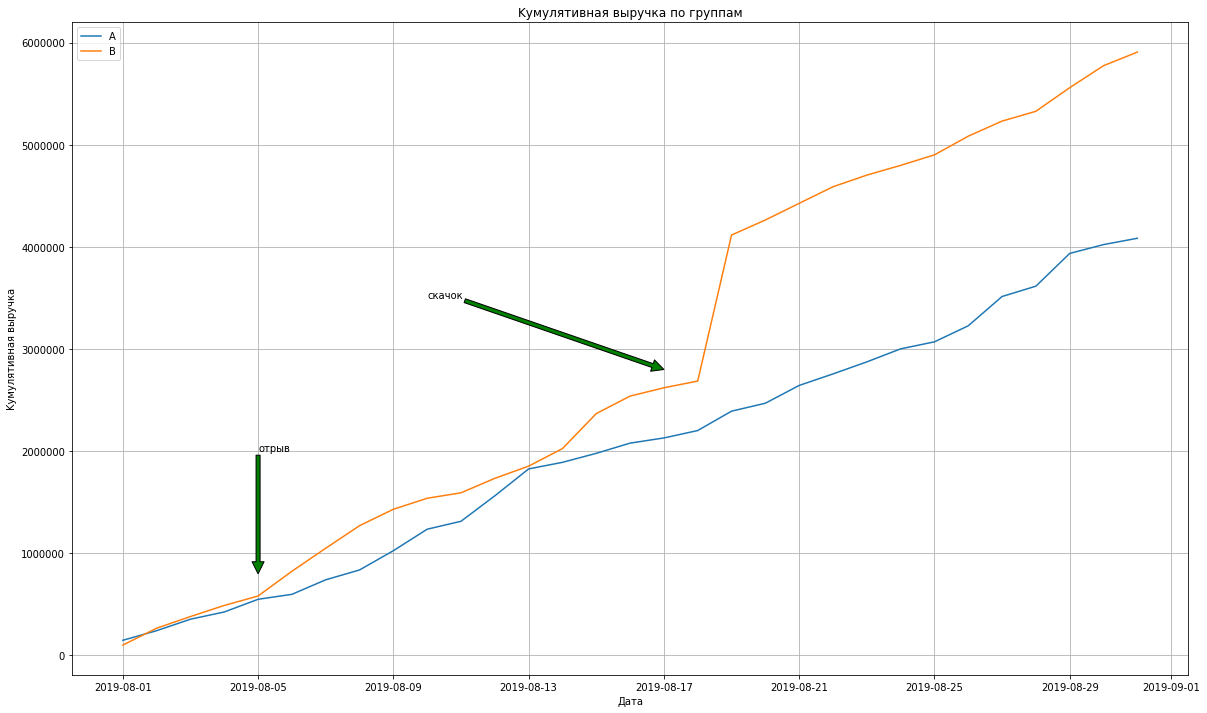

In [43]:
# строю график
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.figure(figsize=(20, 12))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], '-', label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], '-', label='B')
plt.legend(loc='upper left') 
plt.grid()
plt.title('Kумулятивная выручка по группам')
plt.ylabel('Kумулятивная выручка')
plt.xlabel('Дата')
plt.annotate('скачок', xy=('2019-08-17', 2800000), xytext=('2019-08-10', 3500000),
            arrowprops=dict(facecolor='g'))
plt.annotate('отрыв', xy=('2019-08-05', 800000), xytext=('2019-08-05', 2000000),
            arrowprops=dict(facecolor='g')) 
plt.show() 

На этом графике видно, что выручка растёт равномерно и почти одинаково у обоих групп до 2019-08-18, потом идёт резкий скачок у группы B, затем они продолжаю идти вверх параллельно. Это может быть связано с бОльшим числом заказов в этой группе или одним крупным заказом.  

In [44]:
df_orders.query('group == "A" and date == "2019-08-19"').sort_values(by='revenue', ascending=False).head()

,trans_id,vis_id,date,revenue,group
530,3970235543,2912540959,2019-08-19,43990,A
421,3765974140,1357170471,2019-08-19,31680,A
525,3031564664,393266494,2019-08-19,21550,A
366,2037051350,1957949546,2019-08-19,16770,A
531,4016435970,4017075195,2019-08-19,13390,A


In [45]:
df_orders.query('group == "B" and date == "2019-08-19"').sort_values(by='revenue', ascending=False).head()

,trans_id,vis_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
527,1570513684,2837914161,2019-08-19,33405,B
461,2683113224,154576532,2019-08-19,26550,B
368,3268879337,2536252163,2019-08-19,20026,B
463,4170537404,290022471,2019-08-19,16480,B


В группе B есть один заказ на сумму гораздо больше, чем в группе A. Очевидно с ним связан этот скачок.

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

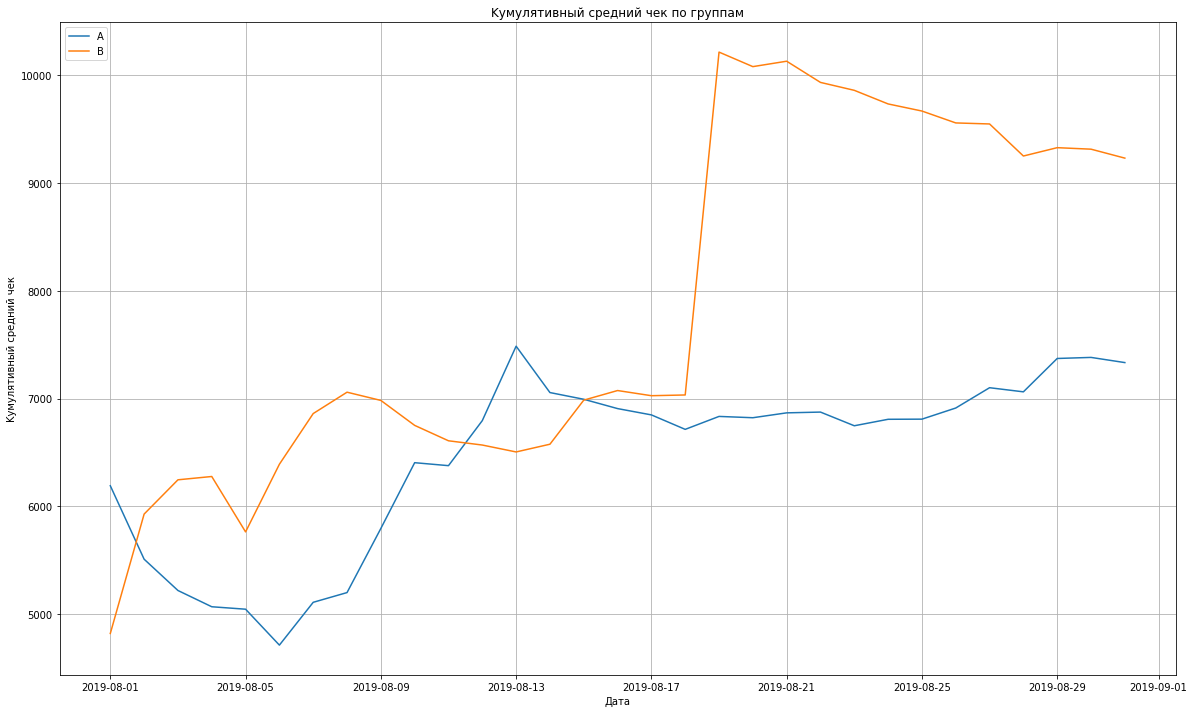

In [46]:
# строю графика среднего чека
plt.figure(figsize=(20, 12))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], '-', label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], '-', label='B')
plt.legend(loc='upper left') 
plt.grid()
plt.title('Kумулятивный средний чек по группам')
plt.ylabel('Kумулятивный средний чек')
plt.xlabel('Дата')
plt.show()

На графике видно, что в начале теста группы ведут себя по-разному после всплеска 2019-08-18 они так же идут параллельно. После 2019-08-18 график группы B естесвенно стремится вниз, ведб больше таких больших заказов не было. 

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

In [47]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

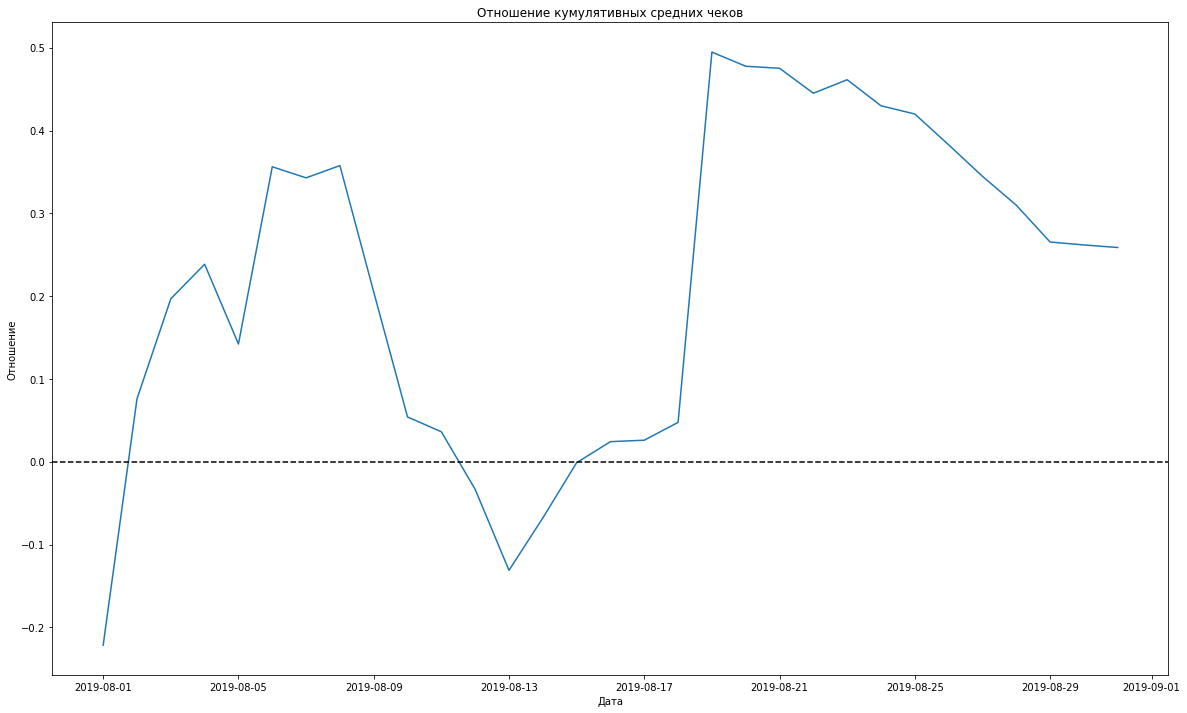

In [48]:
# cтрою отношение средних чеков и строю график
plt.figure(figsize=(20, 12))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Отношение кумулятивных средних чеков')
plt.ylabel('Отношение')
plt.xlabel('Дата')
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

Видно, что линия имеет скачущий вид и поэтому можно предположить, что в данных есть выбросы. Собственно,после первого графика один из них я уже отмечал.

### Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

In [49]:
# считаю кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

In [50]:
# отделяю данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

In [51]:
# отделяю данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

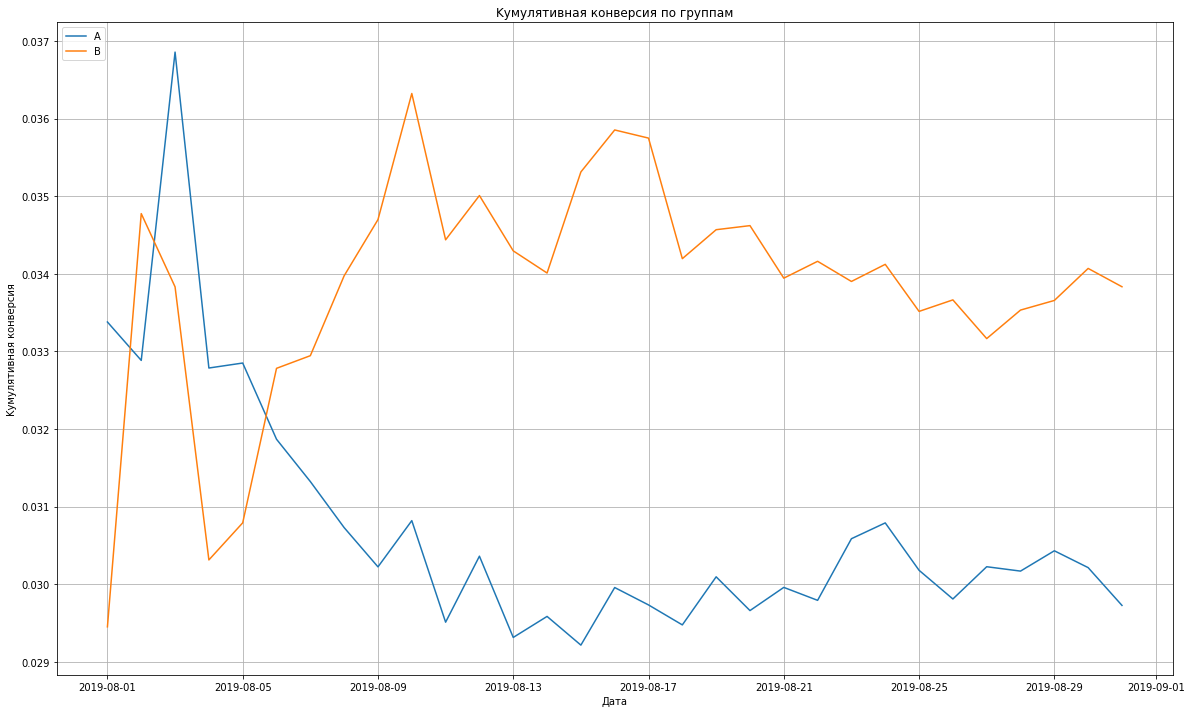

In [52]:
# строим графики
plt.figure(figsize=(20, 12))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], '-', label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], '-', label='B')
plt.legend(loc='upper left') 
plt.grid()
plt.title('Kумулятивная конверсия по группам')
plt.ylabel('Kумулятивная конверсия')
plt.xlabel('Дата')
plt.show()

На этом графике видно, что в начале конверсия в обоих группа сильно скачет и затем более-менее выравниваются, но конверсия группы B выше, чем у группы A. 

### Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

In [53]:
# объединяю данных групп A и B
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

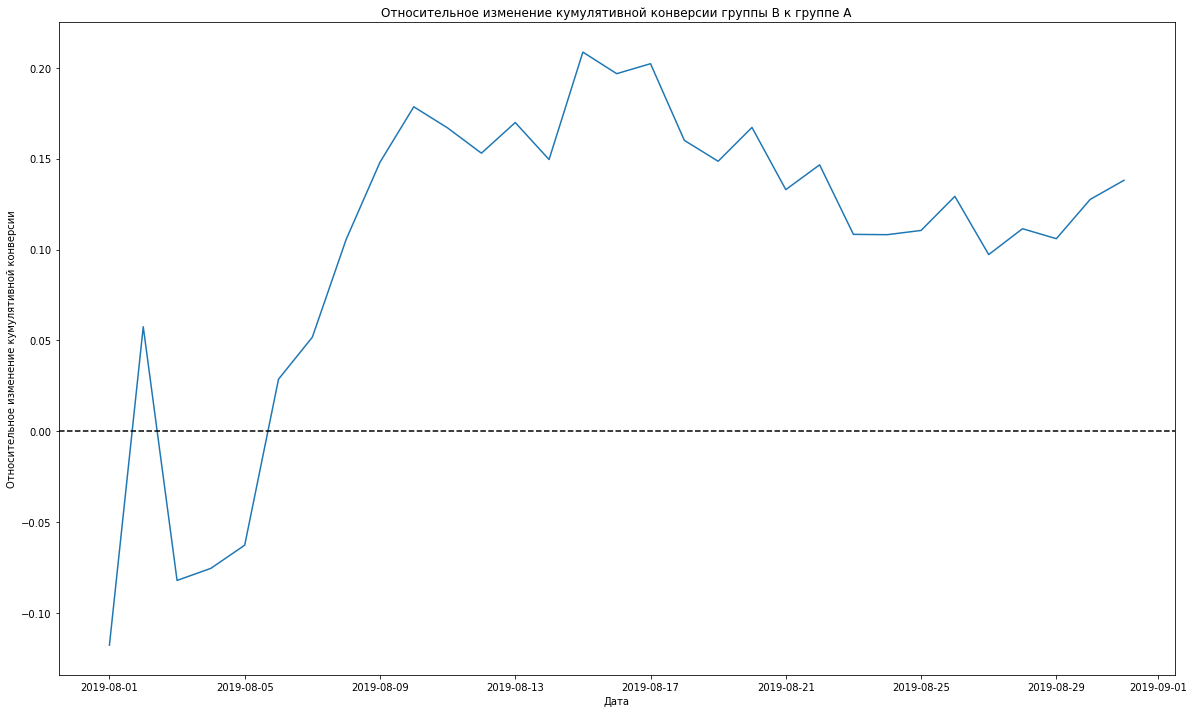

In [54]:
# строю график
plt.figure(figsize=(20, 12))

plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB'] / mergedCumulativeConversions['conversionA'] - 1 
        )
plt.title('Относительное изменение кумулятивной конверсии группы В к группе А')
plt.ylabel('Относительное изменение кумулятивной конверсии')
plt.xlabel('Дата')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()


Можно сказать, что группа B абсолютно превосходит группу A. Так как график конверсии лишь в начале теста показывал отрецательные значения, основную часть времени - только положительные. 

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [55]:
# создаю таблицу и нахожу на каждого юзера количество транзакций 
orders_by_users = df_orders.drop(['group', 'revenue', 'date'], axis=1).groupby('vis_id', as_index=False).agg(
    {'trans_id' : pd.Series.nunique})

In [56]:
orders_by_users.columns = ['users','orders']

In [57]:
orders_by_users.sort_values(by='orders',ascending=False).head(10)

,users,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


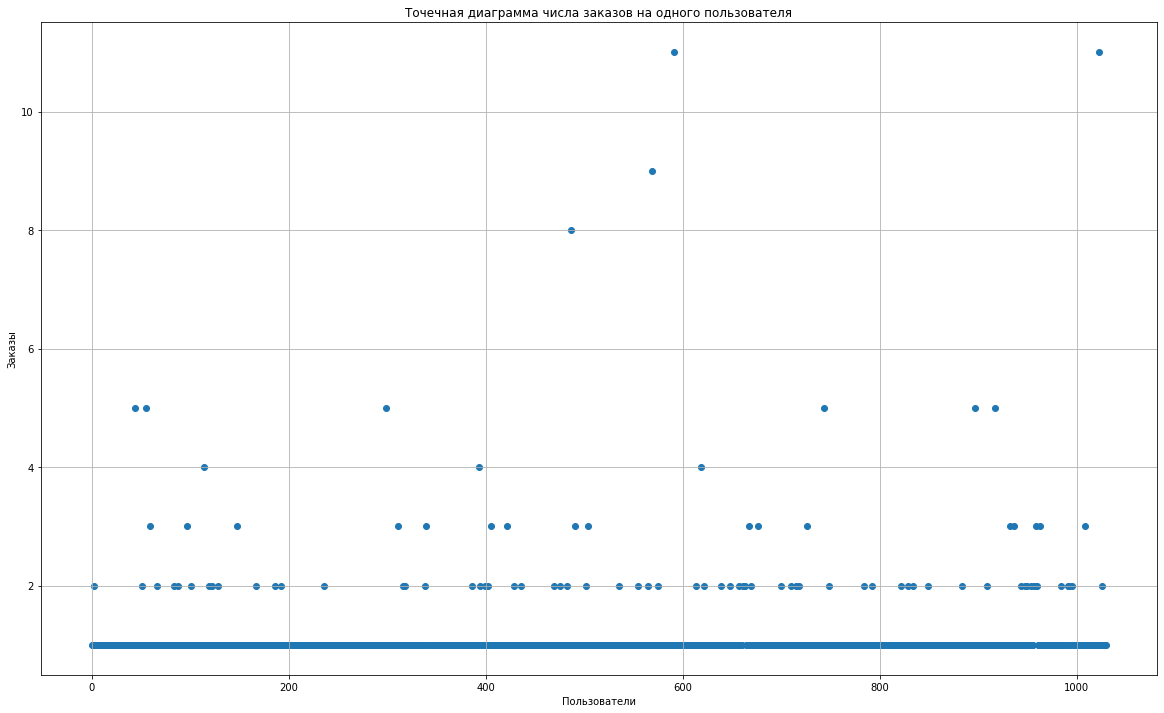

In [58]:
# строю график
x_values = pd.Series(range(0,len(orders_by_users)))

plt.figure(figsize=(20, 12))
plt.scatter(x_values, orders_by_users['orders']) 
plt.grid()
plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.ylabel('Заказы')
plt.xlabel('Пользователи')
plt.show()

По этому графику можно сказать, что подавляющие большенство пользователей делает не более одного заказа.

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [59]:
print(np.percentile(orders_by_users['orders'], [95, 99])) 

[2. 4.]


Здесь можно сказать, что не более 5% пользователей делает два заказа и не более 1% четыре заказа.

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

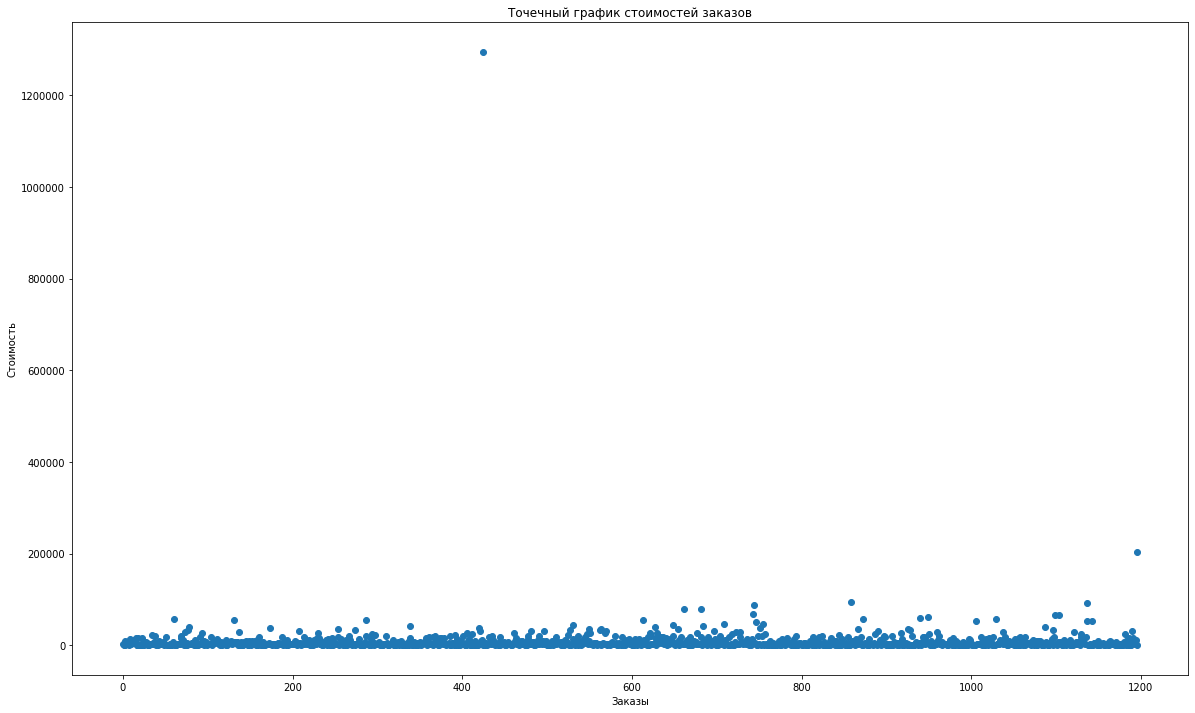

In [60]:
# строю график
x_values = pd.Series(range(0,len(df_orders['revenue'])))
plt.figure(figsize=(20, 12))
plt.scatter(x_values, df_orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость')
plt.xlabel('Заказы')
plt.show()

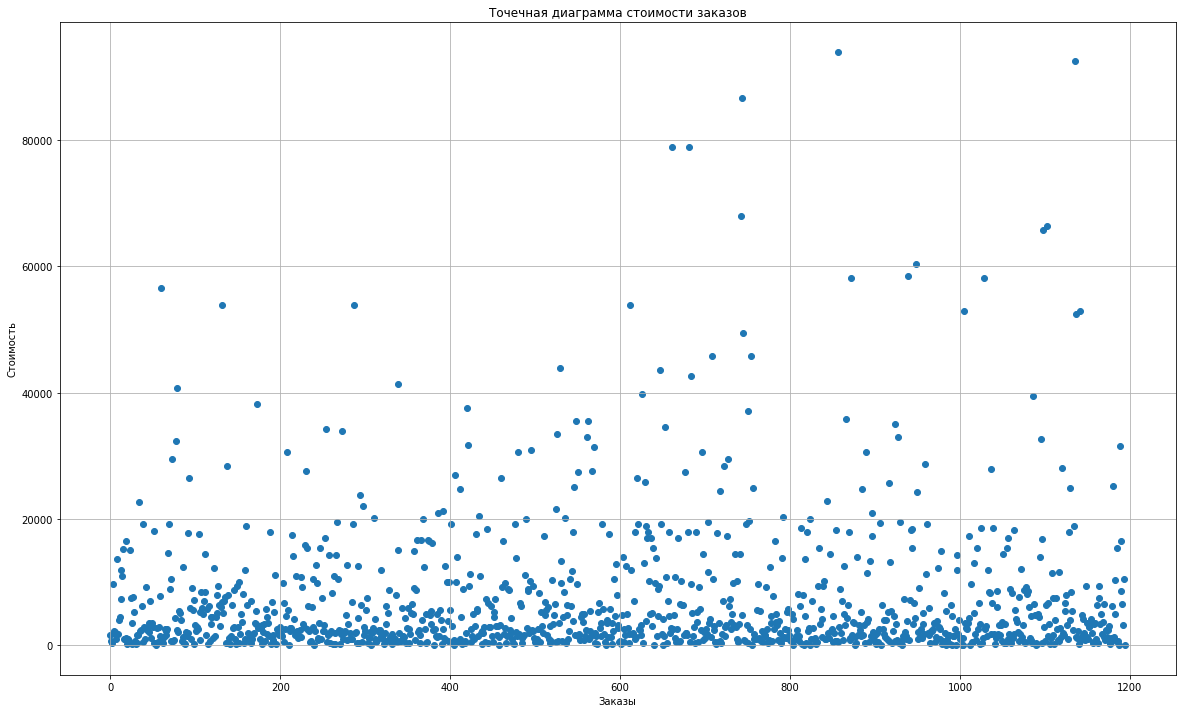

In [61]:
# уменьшаю масштаб 
x_values = pd.Series(range(0,len(df_orders.query('revenue < 200000')['revenue'])))
plt.figure(figsize=(20, 12))
plt.scatter(x_values, df_orders.query('revenue < 200000')['revenue']) 
plt.grid()
plt.title('Точечная диаграмма стоимости заказов')
plt.ylabel('Стоимость')
plt.xlabel('Заказы')
plt.show()

Здесь видно, что стоимость большинства заказов не превышает  20000

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [62]:
print(np.percentile(df_orders['revenue'], [95, 99]))

[28000.  58233.2]


Не более 5 % заказов на сумму более 28000 и не более 1% на сумму больше 58233

<div class="alert alert-block alert-success">
    

__Комментарий от ревьюера №1__

Аномальные границы найдены верно.
</div>

### Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

Для подсчёта статистической значимости нужно сформулировать две гипотезы

Нулевая гипотеза: статистически значимых различий в конверсии между группами по «сырым» данным нет.

Альтернативная гипотеза: между группами есть статистически значимые различия в конверсии по "сырым" данным.


In [63]:
# таблица с юзерами и количеством заказов из группы A 
ordersByUsersA = df_orders[df_orders['group']=='A'].groupby('vis_id', as_index=False).agg({'trans_id' : 'nunique'})
ordersByUsersA.columns = ['user_id', 'orders']

In [64]:
# таблица с юзерами и количеством заказов из группы B
ordersByUsersB = df_orders[df_orders['group']=='B'].groupby('vis_id', as_index=False).agg({'trans_id' : 'nunique'})
ordersByUsersB.columns = ['user_id', 'orders']

In [65]:
visitorsADaily = df_visits[df_visits['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

In [66]:
visitorsBDaily = df_visits[df_visits['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [67]:
# объявляю переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(
    0, index=np.arange(visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

In [68]:
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(
    0, index=np.arange(visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [69]:
print('Кол-во значений в выборках (сырые данные) для применения критерия Манна-Уитни:\n',
     'выборка А: ', sampleA.shape[0], '\n',
     'выборка В: ', sampleB.shape[0])

Кол-во значений в выборках (сырые данные) для применения критерия Манна-Уитни:
 выборка А:  18736 
 выборка В:  18916


In [70]:
# проверяю гипотезу
alpha = .05

results = st.mannwhitneyu(sampleA, sampleB,alternative='two-sided')

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

p-value:  0.016792355056752608
Отвергаем нулевую гипотезу: разница статистически значима


In [71]:
print('p-value: '"{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))


p-value: 0.008


In [72]:
print('Различия групп: '"{0:.3f}".format((sampleB.mean() / sampleA.mean() - 1)*100),'%')

Различия групп: 13.808 %


Можно сделать вывод, что конверсия групп различается существенно и у группы B она почти на 14 процентов выше.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Для подсчёта статистической значимости нужно сформулировать две гипотезы

Нулевая гипотеза: статистически значимых различий в среднем чеке заказа  между группами по «сырым» данным нет.

Альтернативная гипотеза: между группами есть статистически значимые различия в среднем чеке заказа по "сырым" данным.

In [73]:
alpha = .05

results = st.mannwhitneyu(df_orders[df_orders['group']=='A']['revenue'], 
                          df_orders[df_orders['group']=='B']['revenue'],alternative='two-sided')

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

p-value:  0.7292909855432458
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [74]:
print('Различия групп: '"{0:.3f}".format((df_orders[df_orders['group']=='B']['revenue'].mean()/df_orders[df_orders['group']=='A']['revenue'].mean()-1)*100),'%')

Различия групп: 25.871 %


Проверка гипотезы показала, что статистически значимых различий в среднем чеке между группами нет. Хотя этот параметр почти на 26 процентов выше у группы B.

### Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

Я решил отчистить данные по 95 процентилю. Поэтому аномальными буду считать пользователей сделавших более 2 заказов и заказы стоимостью более 58233. 

Для подсчёта статистической значимости нужно сформулировать две гипотезы

Нулевая гипотеза: статистически значимых различий в конверсии между группами по «очищенным»  данным нет.

Альтернативная гипотеза: между группами есть статистически значимые различия в конверсии по «очищенным»  данным.


In [75]:
# 'очищаю' данные
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['user_id'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['user_id']], axis = 0)

In [76]:
usersWithExpensiveOrders = df_orders[df_orders['revenue'] > 28000]['vis_id']

In [77]:
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

In [78]:
abnormalUsers

1099     148427295
18       199603092
928      204675465
23       237748145
37       249864742
           ...    
723     4009017467
627     4120364173
743     4133034833
499     4256040402
662     4266935830
Length: 74, dtype: int64

In [79]:
print('Получилось', abnormalUsers.count(), 'аномальных пользователя')

Получилось 74 аномальных пользователя


In [80]:
# 
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))]['orders'],pd.Series(
    0, index=np.arange(visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

In [81]:
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))]['orders'],pd.Series(
    0, index=np.arange(visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [82]:
print('Кол-во значений в выборках (очищенные данные) для применения критерия Манна-Уитни:\n',
     'выборка А: ', sampleAFiltered.shape[0], '\n',
     'выборка В: ', sampleBFiltered.shape[0])

Кол-во значений в выборках (очищенные данные) для применения критерия Манна-Уитни:
 выборка А:  18690 
 выборка В:  18869


In [83]:
results = st.mannwhitneyu(sampleAFiltered, 
                          sampleBFiltered,
                         alternative='two-sided')

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")


p-value:  0.013042592743036758
Отвергаем нулевую гипотезу: разница статистически значима


In [84]:
print('Различия групп: '"{0:.3f}".format((sampleBFiltered.mean() / sampleAFiltered.mean() - 1)*100),'%')

Различия групп: 17.270 %


Можно сделать вывод, что разница между группами статистически значима и прирост группы B около 17 процентов.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Нулевая гипотеза: статистически значимых различий в среднем чеке между группами по «очищенным»  данным нет.

Альтернативная гипотеза: между группами есть статистически значимые различия в среднем чеке по «очищенным»  данным.

In [85]:
ordersAFiltered = df_orders[np.logical_and(df_orders['group']=='A',np.logical_not(df_orders['vis_id'].isin(abnormalUsers)))]['revenue']

In [86]:
ordersBFiltered = df_orders[np.logical_and(df_orders['group']=='B',np.logical_not(df_orders['vis_id'].isin(abnormalUsers)))]['revenue']

In [87]:
results = st.mannwhitneyu(ordersAFiltered, 
                          ordersBFiltered,
                         alternative='two-sided')

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

p-value:  0.738481751314565
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [88]:
print('Различия групп: '"{0:.3f}".format((
    df_orders[np.logical_and(df_orders['group']=='B',np.logical_not(df_orders['vis_id'].isin(abnormalUsers)))]['revenue'].mean()/
    df_orders[np.logical_and(
        df_orders['group']=='A',
        np.logical_not(df_orders['vis_id'].isin(abnormalUsers)))]['revenue'].mean() - 1)*100),'%')

Различия групп: -1.962 %


Отсюда можно сделать вывод, что выросы очень сильно повлияли на результаты теста. Без отчистки данных средний чек группы B был выше на 25 процентов, а после отчистки стал хуже на 2.

### Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.


C помощью критерия Манна-Уитни я проанализировал статистическую значимость различий в конверсии и среднем чеке между группами по "сырым" и "очищенным" данным и могу сделать следующие выводы:
* Есть статистическая значимость различий в конверсии между группами и в очищенных данных и в сырых данных.
* По среднему чеку можно сказать, что выбросы сильно повлияли на результаты и до очистки данных средний чек был больше на 25 процентов у группы B, но после отчистки оказалось, что разница составляет 2 процента в пользу группы A.

Подводя итог и отвечая на вопрос, мне кажется, что тест нужно остановить. Потому что на по графику конверсии можно видеть, что он стабилизируется. И признатить победу группы B, так как по всем графикам видно, что у  неё показатели лучше. 

## Вывод

В первой части проекта я приоритезировал данные мне гипотезы двумя техниками ICE и RICE. Так как они они отличаются только одном параметром - параметром Reach - то есть охватом, соответсвенно в RICE наиболее приоритетными стали гипотезы, у которых этот параметр больше:

* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
* Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

по технике ICE

* Запустить акцию, дающую скидку на товар в день рождения
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок





Во второй части проекта мне нужно было проанализировать результаты A/B - теста и построить графики. Если посмотреть на графики, то можно увидеть, что группа B показывала результаты лучше, чем группа А и по конверсии, и по среднему чеку. Так же для более точного анализа я отчистил данные от выбросов и нашел аномальные значения количества заказов и суммы заказов. 
* Не более 5 % заказов совершается на сумму более 28000 и не более 1% на сумму больше 58233
* И не более 5% пользователей делает два заказа и не более 1% четыре заказа

Несмотря на то что после очистки данных средний чек у групп почти сравнялся. Можно сделать вывод, что группа B проявила себя лучше.